# Don't Drop Out Of Numpy

In [1]:
cd ..

/home/jovyan/projects/dsi/09-unsupervised_learning-a_tutorial_on_pca


In [2]:
from lib.preprocessing import BoxCoxTransformer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

This lesson will make heavy use of the numerical python library, `numpy`. Remember, its very important when working in `numpy` that you do not "drop out of `numpy`" that is change your data into regular lists.

In [3]:
type([1,2])

list

In [4]:
type(np.array([1,2]))

numpy.ndarray

The most common way to "drop out of `numpy`" is to use a list comprehension on a `numpy` array.

In [5]:
type([v for v in np.array([1,2])])

list

#### `numpy` vs `math`

Python has a `math` library in addition to `numpy`. The main difference is that `numpy` works on vectors, whereas `math` works on scalar values.

In [6]:
import math

We will need cosine and sine functions to define our true function. As we will be performing vector calculations, we will need to use the `numpy` trigonometric functions as opposed to the `math` trigonometric functions.

In [7]:
vv = np.linspace(1,1000,1000)
np.cos(vv)
try:
    math.cos(vv)
except TypeError as e:
    print(e)

only length-1 arrays can be converted to Python scalars


We could perform a list comprehension using the `math` function.

In [8]:
cos_vv = [math.cos(v) for v in vv]

The issue is time.

In [9]:
%%timeit
np.cos(vv)

The slowest run took 4.13 times longer than the fastest. This could mean that an intermediate result is being cached.
129 µs ± 71.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
%%timeit
[math.cos(v) for v in vv]

The slowest run took 4.64 times longer than the fastest. This could mean that an intermediate result is being cached.
2.56 ms ± 990 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


This difference only increases for larger $n$.

In [11]:
%%timeit 
np.cos(np.linspace(1,1000,10000))

896 µs ± 390 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [12]:
%%timeit 
[math.cos(v) for v in np.linspace(1,1000,10000)]

The slowest run took 4.24 times longer than the fastest. This could mean that an intermediate result is being cached.
11.5 ms ± 6.23 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Unsupervised Learning

With unsupervised learning, we are still interested in developing models, but we do not have an output for each input. Rather we simply have data points.


### With unsupervised learning, there is no target.

# Moments

If the points represent mass:
- the zeroth moment is the total mass
- the first moment divided by the total mass is the center of mass

If the points represent probability density:
- the zeroth moment is the total probability (i.e. one)
- the first moment is the mean
- the second central moment is the variance
- the third standardized moment is the skewness

### Critical to Remember

- the **mean** is the expected value of a feature
- the **variance** is a central moment and describes the spread around an expected value
- the **skewness** is a standardized moment and describes the degree to which the feature's distribution deviates from the normal distribution
- to centralize a feature, subtract the mean from the feature

   e.g. `X_c = X - X.mean()`

- to standardize a feature, subtract the mean and divide by the standard deviation

   e.g. `X_sc = (X - X.mean())/X.std()`
- `sklearn` has no built-in tool for removing skew, though one is in development and it may make it in to future versions. 
- the `lib.preprocessing` module in this repository includes an `sklearn` compatible `BoxCoxTransformer`.

## Deskewing Data

In [13]:
from sklearn.datasets import load_iris
from scipy.stats import skew

In [15]:
X, y = load_iris(return_X_y=True)
X = pd.DataFrame(X)
X.sample(4)

,0,1,2,3
138,6.0,3.0,4.8,1.8
47,4.6,3.2,1.4,0.2
109,7.2,3.6,6.1,2.5
67,5.8,2.7,4.1,1.0


In [16]:
stats = X.describe().T
stats

,count,mean,std,min,25%,50%,75%,max
0,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
1,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
2,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
3,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [17]:
stats['skew'] = skew(X)
stats

,count,mean,std,min,25%,50%,75%,max,skew
0,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9,0.311753
1,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4,0.330703
2,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9,-0.271712
3,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5,-0.103944


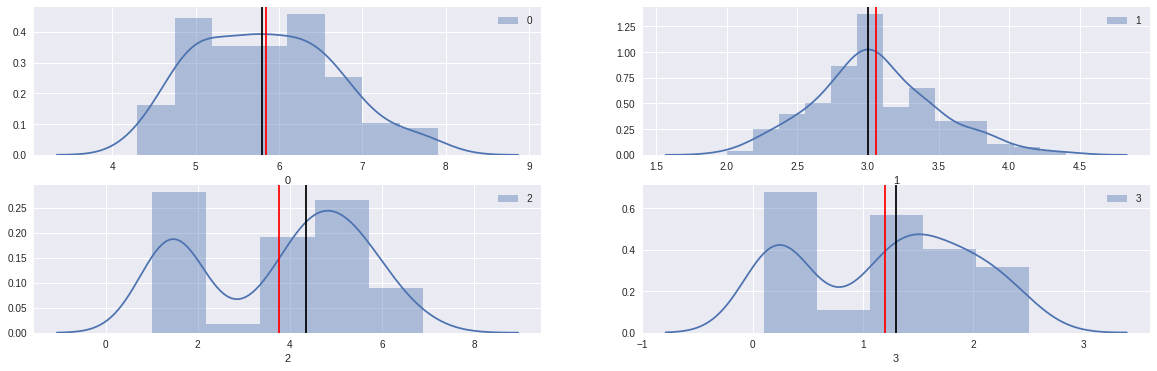

In [18]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(X.columns):
    fig.add_subplot(221+i)
    sns.distplot(X[col], label=str(col))
    plt.axvline(X[col].mean(), c='red')
    plt.axvline(X[col].median(), c='black')
    plt.legend()

In [19]:
X_dsk = pd.DataFrame(BoxCoxTransformer().fit_transform(X))

In [20]:
stats_dsk = X_dsk.describe().T
stats_dsk['skew'] = skew(X_dsk)
stats_dsk

,count,mean,std,min,25%,50%,75%,max,skew
0,150.0,1.549011,0.109485,1.314921,1.451378,1.552034,1.627818,1.786340,0.005152
1,150.0,1.286758,0.189930,0.759982,1.181652,1.272797,1.401446,1.809795,0.001309
2,150.0,2.582043,1.626827,0.000000,0.589672,3.148368,3.822542,5.414495,-0.297724
3,150.0,0.084901,0.787603,-1.199892,-0.837489,0.285848,0.714602,1.248947,-0.343819


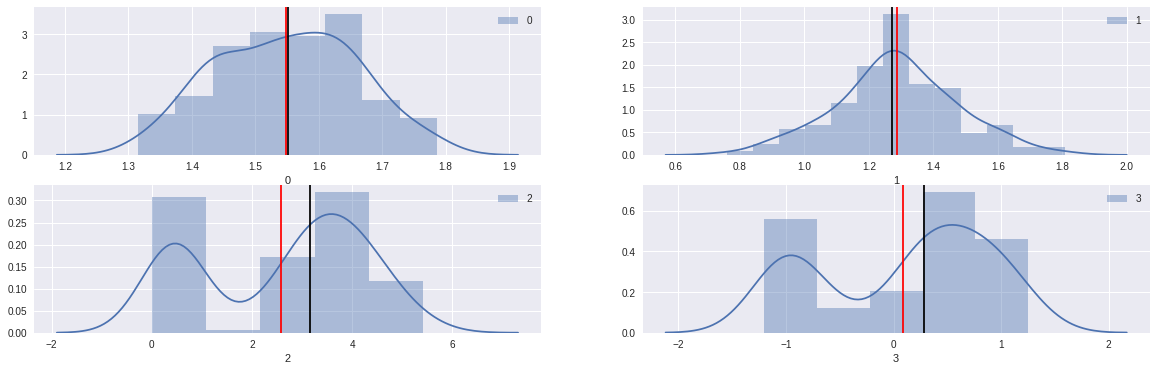

In [21]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(X_dsk.columns):
    fig.add_subplot(221+i)
    sns.distplot(X_dsk[col], label=str(col))
    plt.axvline(X_dsk[col].mean(), c='red')
    plt.axvline(X_dsk[col].median(), c='black')
    plt.legend()

In [22]:
X_log = np.log(X)

In [23]:
stats_log = X_log.describe().T
stats_log['skew'] = skew(X_log)
stats_log

,count,mean,std,min,25%,50%,75%,max,skew
0,150.0,1.755393,0.141189,1.458615,1.629241,1.757858,1.856298,2.066863,0.043157
1,150.0,1.106442,0.142341,0.693147,1.029619,1.098612,1.193922,1.481605,-0.116179
2,150.0,1.175498,0.589493,0.000000,0.470004,1.470110,1.629241,1.931521,-0.581708
3,150.0,-0.176944,0.991394,-2.302585,-1.203973,0.262364,0.587787,0.916291,-0.751676


In [24]:
X_cond = X_dsk.copy()
X_cond[2] = X[2]
X_cond[3] = X[3]

In [25]:
stats_dsk = X_cond.describe().T
stats_dsk['skew'] = skew(X_cond)
stats_dsk

,count,mean,std,min,25%,50%,75%,max,skew
0,150.0,1.549011,0.109485,1.314921,1.451378,1.552034,1.627818,1.786340,0.005152
1,150.0,1.286758,0.189930,0.759982,1.181652,1.272797,1.401446,1.809795,0.001309
2,150.0,3.758667,1.764420,1.000000,1.600000,4.350000,5.100000,6.900000,-0.271712
3,150.0,1.198667,0.763161,0.100000,0.300000,1.300000,1.800000,2.500000,-0.103944


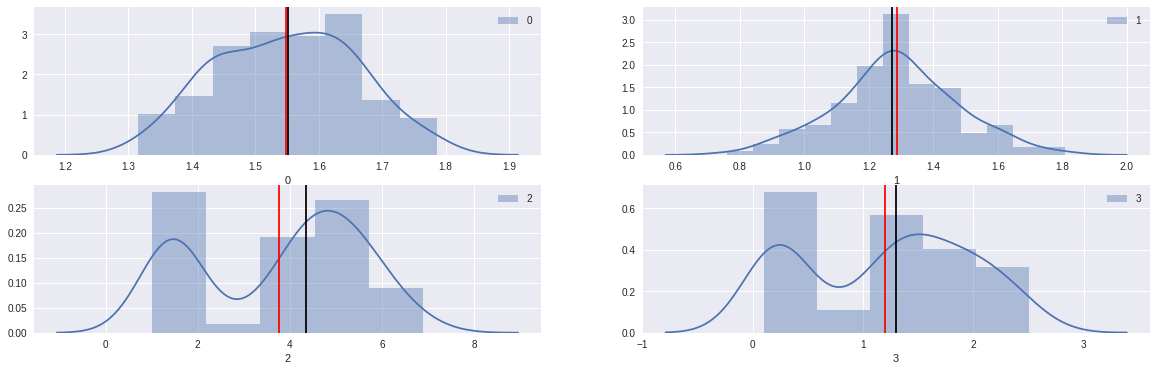

In [26]:
fig = plt.figure(figsize=(20,6))
for i, col in enumerate(X_cond.columns):
    fig.add_subplot(221+i)
    sns.distplot(X_cond[col], label=str(col))
    plt.axvline(X_cond[col].mean(), c='red')
    plt.axvline(X_cond[col].median(), c='black')
    plt.legend()